## **EDA**

In [ ]:
# Mount Google Drive
from google.colab import drive
import cv2
import os
import json
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
import os

# Specify the new directory you want to set as the current working directory
new_directory = '/content/drive/My Drive/Frames/code/Final/Preprocessing'

# Change the current working directory
os.chdir(new_directory)

# Verify the change
print("Current Working Directory: ", os.getcwd())


Current Working Directory:  /content/drive/My Drive/Frames/code/Final/Preprocessing


In [ ]:
import cv2

def print_video_metadata(video_path):
    # Create a video capture object
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Get the frame rate of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Get the resolution of the video
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Print the metadata
    print(f"Total Frames: {total_frames}")
    print(f"Frame Rate (FPS): {fps}")
    print(f"Resolution: {width}x{height}")

    # Release the video capture object
    cap.release()

# Example usage
video_path = 'video.mp4'
print_video_metadata(video_path)

Total Frames: 150
Frame Rate (FPS): 25.0
Resolution: 640x480


In [ ]:
import cv2

def print_video_metadata(video_path):
    # Create a video capture object
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    # Get the frame rate of the video
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Get the resolution of the video
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Print the metadata
    print(f"Total Frames: {total_frames}")
    print(f"Frame Rate (FPS): {fps}")
    print(f"Resolution: {width}x{height}")

    # Release the video capture object
    cap.release()

# Example usage
video_path = 'video (1).mp4'
print_video_metadata(video_path)

Total Frames: 200
Frame Rate (FPS): 25.0
Resolution: 640x480


In [ ]:
import os

base_dir = '/content/drive/My Drive/Gun_Action_Recognition_Dataset'

def count_videos_in_folders(base_dir):
    video_counts = {}
    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            total_videos = 0
            for subfolder in os.listdir(category_path):
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path) and not any(os.path.isdir(os.path.join(subfolder_path, item)) for item in os.listdir(subfolder_path)):
                    video_files = [f for f in os.listdir(subfolder_path) if f.endswith('.mp4')]
                    total_videos += len(video_files)
            video_counts[category] = total_videos
    return video_counts

# Run the count_videos_in_folders function
video_counts = count_videos_in_folders(base_dir)
print("Category and total video count in first layer subfolders:")
for category, count in video_counts.items():
    print(f"{category}: {count} videos")


Category and total video count in first layer subfolders:
No_Gun: 118 videos
Machine_Gun: 139 videos
Handgun: 141 videos


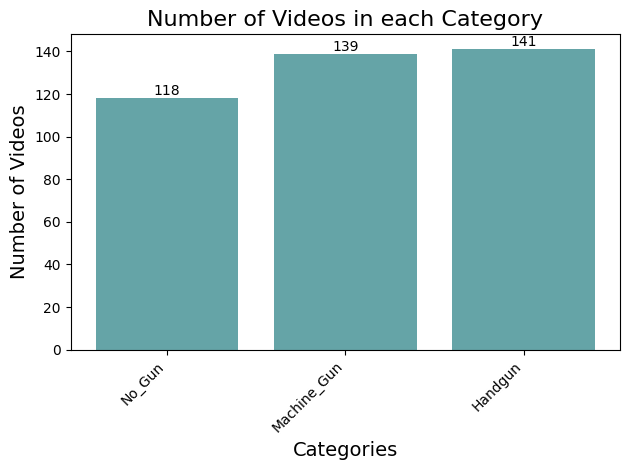

In [ ]:
# prompt: plot the abouve count in a plot along with no of video counts on top of bar . bars should be in #65A4A7, the numbers above the plot is not correctly aligned.

import matplotlib.pyplot as plt

# Prepare data
categories = list(video_counts.keys())
counts = list(video_counts.values())

# Create bar chart
plt.bar(categories, counts, color="#65A4A7")

# Add video counts on top of bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha="center", va="bottom")

# Customize plot
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Number of Videos", fontsize=14)
plt.title("Number of Videos in each Category", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show plot
plt.show()


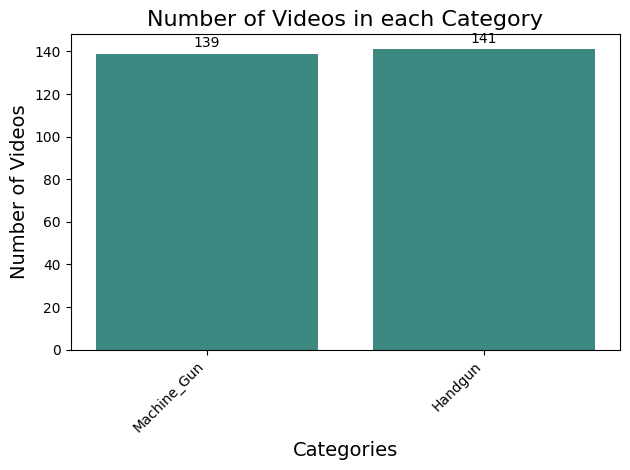

In [1]:
import matplotlib.pyplot as plt

# Assume 'video_counts' is a dictionary with category names as keys and counts as values
video_counts = {'Machine_Gun': 139, 'No_Gun': 118, 'Handgun': 141}

# Filter out the 'No_Gun' category
filtered_categories = {key: val for key, val in video_counts.items() if key != 'No_Gun'}

# Prepare data
categories = list(filtered_categories.keys())
counts = list(filtered_categories.values())

# Create bar chart
plt.bar(categories, counts, color="#3D8881")

# Add video counts on top of bars
for i, count in enumerate(counts):
    plt.text(i, count + 3, str(count), ha="center")  # Adjust the vertical position slightly for better visibility

# Customize plot
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Number of Videos", fontsize=14)
plt.title("Number of Videos in each Category", fontsize=16)
plt.xticks(rotation=45, ha="right")  # Ensure labels are rotated for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation

# Show plot
plt.show()


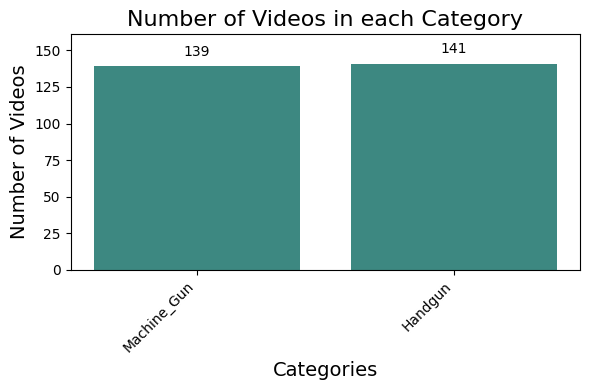

In [4]:
import matplotlib.pyplot as plt

# Prepare data
categories = ['Machine_Gun', 'Handgun']  # Example categories
counts = [139, 141]  # Corresponding counts

# Create bar chart
plt.figure(figsize=(6, 4))  # Adjust the figure size to give more room
bars = plt.bar(categories, counts, color="#3D8881")

# Add video counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, yval, ha='center', va='bottom')

# Customize plot
plt.xlabel("Categories", fontsize=14)
plt.ylabel("Number of Videos", fontsize=14)
plt.title("Number of Videos in each Category", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(counts) + 20)  # Adjust the y-limit to add space above the highest bar

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


In [ ]:
pip install moviepy


Category and total video count in first layer subfolders:
No_Gun: 118 videos
Machine_Gun: 139 videos
Handgun: 141 videos

Minimum and Maximum durations for each category:
No_Gun: Min Duration - 5.0 seconds, Max Duration - 15.0 seconds
Machine_Gun: Min Duration - 6.0 seconds, Max Duration - 15.0 seconds
Handgun: Min Duration - 5.0 seconds, Max Duration - 12.0 seconds


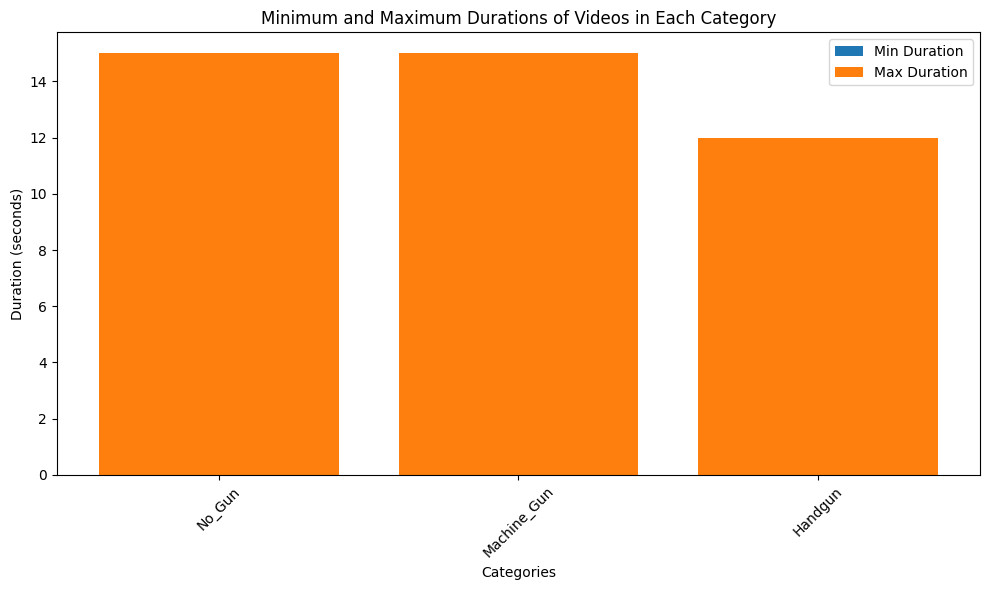

In [ ]:
import os
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt

base_dir = '/content/drive/My Drive/Gun_Action_Recognition_Dataset'

def get_video_duration(video_path):
    clip = VideoFileClip(video_path)
    duration = clip.duration
    clip.close()
    return duration

def count_videos_in_folders(base_dir):
    video_counts = {}
    min_durations = {}
    max_durations = {}

    for category in os.listdir(base_dir):
        category_path = os.path.join(base_dir, category)
        if os.path.isdir(category_path):
            total_videos = 0
            min_duration = float('inf')
            max_duration = float('-inf')

            for subfolder in os.listdir(category_path):
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path) and not any(os.path.isdir(os.path.join(subfolder_path, item)) for item in os.listdir(subfolder_path)):
                    video_files = [f for f in os.listdir(subfolder_path) if f.endswith('.mp4')]
                    total_videos += len(video_files)

                    for video_file in video_files:
                        video_path = os.path.join(subfolder_path, video_file)
                        duration = get_video_duration(video_path)
                        min_duration = min(min_duration, duration)
                        max_duration = max(max_duration, duration)

            video_counts[category] = total_videos
            min_durations[category] = min_duration
            max_durations[category] = max_duration

    return video_counts, min_durations, max_durations

# Run the count_videos_in_folders function
video_counts, min_durations, max_durations = count_videos_in_folders(base_dir)

# Print the results
print("Category and total video count in first layer subfolders:")
for category, count in video_counts.items():
    print(f"{category}: {count} videos")

print("\nMinimum and Maximum durations for each category:")
for category in min_durations.keys():
    print(f"{category}: Min Duration - {min_durations[category]} seconds, Max Duration - {max_durations[category]} seconds")




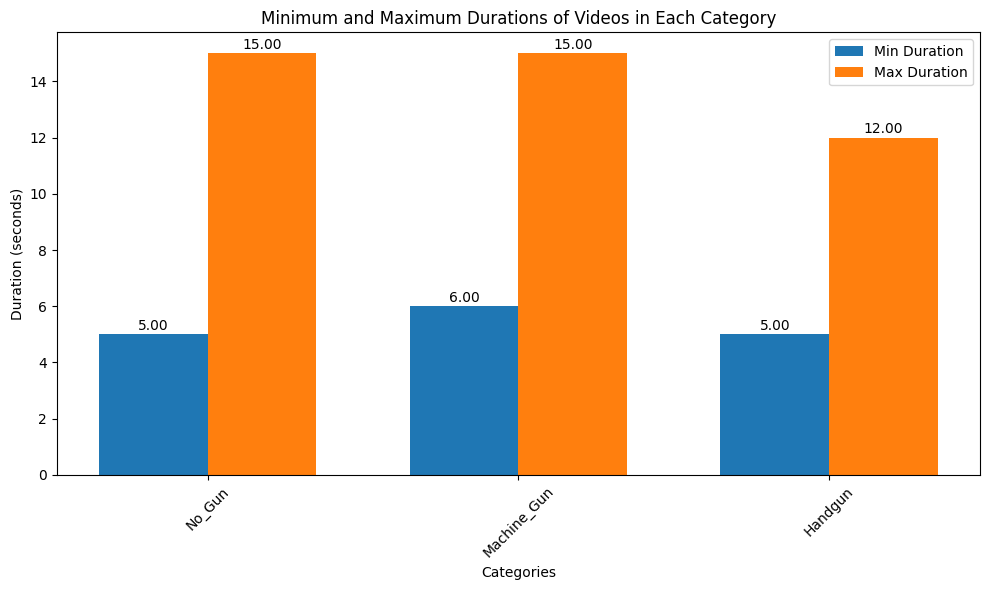

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
categories = list(min_durations.keys())
min_durations_list = list(min_durations.values())
max_durations_list = list(max_durations.values())

# Define the width of each bar
bar_width = 0.35

# Create an array for the x positions of the bars
x = np.arange(len(categories))

plt.figure(figsize=(10, 6))

# Plot the minimum durations as grouped bars
min_bars = plt.bar(x - bar_width/2, min_durations_list, width=bar_width, label='Min Duration')

# Plot the maximum durations as grouped bars
max_bars = plt.bar(x + bar_width/2, max_durations_list, width=bar_width, label='Max Duration')

plt.xlabel('Categories')
plt.ylabel('Duration (seconds)')
plt.title('Minimum and Maximum Durations of Videos in Each Category')
plt.xticks(x, categories, rotation=45)
plt.legend()

# Add duration values on top of each bar
for bar, duration in zip(min_bars, min_durations_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{duration:.2f}', ha='center', va='bottom')

for bar, duration in zip(max_bars, max_durations_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{duration:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


The image is in BGR color space.


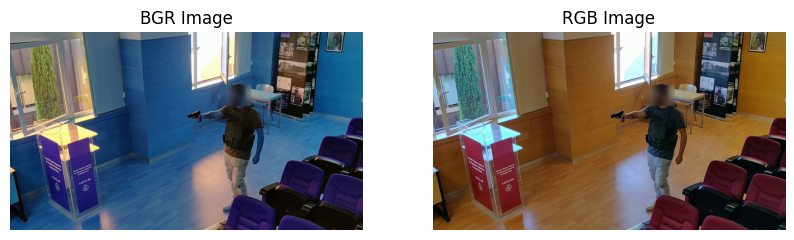

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR format
image_bgr = cv2.imread('Image59324.jpg')

# Check if the image is loaded successfully
if image_bgr is None:
    print("Error loading the image.")
else:
    if image_bgr.shape[2] == 3:
        print("The image is in BGR color space.")
        # Convert BGR image to RGB image
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Create a figure and two subplots for BGR and RGB images
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        # Plot the BGR image
        axs[0].imshow(image_bgr)
        axs[0].set_title('BGR Image')

        # Plot the RGB image
        axs[1].imshow(image_rgb)
        axs[1].set_title('RGB Image')

        # Remove axis ticks and labels for a cleaner display
        axs[0].axis('off')
        axs[1].axis('off')

        # Show the plot
        plt.show()
    else:
        print("The image is not in BGR color space or the image has an unexpected shape.")


The image is in BGR color space.


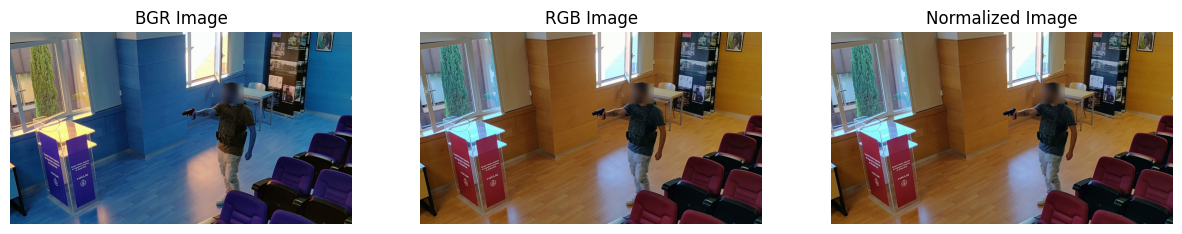

Min and Max values before normalization: 0, 255
Min and Max values after normalization: 0.0, 1.0


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image in BGR format
image_bgr = cv2.imread('Image59324.jpg')

# Check if the image is loaded successfully
if image_bgr is None:
    print("Error loading the image.")
else:
    if image_bgr.shape[2] == 3:
        print("The image is in BGR color space.")
        # Convert BGR image to RGB image
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

        # Create a figure and two subplots for BGR and RGB images
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))

        # Plot the BGR image
        axs[0].imshow(image_bgr)
        axs[0].set_title('BGR Image')
        axs[0].axis('off')

        # Plot the RGB image
        axs[1].imshow(image_rgb)
        axs[1].set_title('RGB Image')
        axs[1].axis('off')

        # Normalize the RGB image
        normalized_image = image_rgb.astype(np.float32) / 255.0

        # Plot the normalized image
        axs[2].imshow(normalized_image)
        axs[2].set_title('Normalized Image')
        axs[2].axis('off')

        # Show the plot
        plt.show()

        # Display min and max values before and after normalization
        print(f"Min and Max values before normalization: {np.min(image_rgb)}, {np.max(image_rgb)}")
        print(f"Min and Max values after normalization: {np.min(normalized_image)}, {np.max(normalized_image)}")
    else:
        print("The image is not in BGR color space or the image has an unexpected shape.")


In [ ]:
import torch
import numpy as np

xmin, ymin, xmax, ymax = 526.428576769653, 240.571428328652, 716.000006231262, 567.428571104869

# Stack bounding box coordinates into a tensor
box_tensor = torch.tensor([xmin, ymin, xmax, ymax])

# Display original bounding box data
print(f"Original Bounding Box Coordinates: ({xmin}, {ymin}, {xmax}, {ymax})")

# Display structured bounding box tensor
print("Structured Bounding Box Tensor:")
print(f"Bounding Box Tensor: {box_tensor}")


Original Bounding Box Coordinates: (526.428576769653, 240.571428328652, 716.000006231262, 567.428571104869)
Structured Bounding Box Tensor:
Bounding Box Tensor: tensor([526.4286, 240.5714, 716.0000, 567.4286])


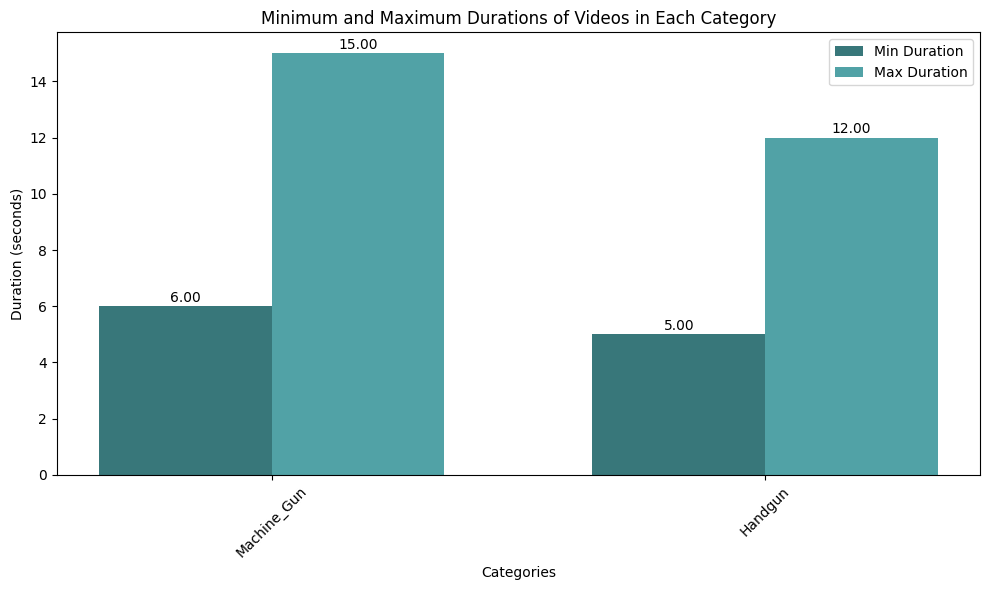

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration; you should replace these with your actual data
min_durations = {'No_Gun': 5.00, 'Machine_Gun': 6.00, 'Handgun': 5.00}
max_durations = {'No_Gun': 15.00, 'Machine_Gun': 15.00, 'Handgun': 12.00}

# Filter out 'No_Gun' category
min_durations = {key: val for key, val in min_durations.items() if key != 'No_Gun'}
max_durations = {key: val for key, val in max_durations.items() if key != 'No_Gun'}

# Plotting
categories = list(min_durations.keys())
min_durations_list = list(min_durations.values())
max_durations_list = list(max_durations.values())

# Define the width of each bar
bar_width = 0.35

# Create an array for the x positions of the bars
x = np.arange(len(categories))

plt.figure(figsize=(10, 6))

# Plot the minimum durations as grouped bars
min_bars = plt.bar(x - bar_width/2, min_durations_list, width=bar_width, color='#38777A', label='Min Duration')

# Plot the maximum durations as grouped bars
max_bars = plt.bar(x + bar_width/2, max_durations_list, width=bar_width, color='#51A2A6', label='Max Duration')

plt.xlabel('Categories')
plt.ylabel('Duration (seconds)')
plt.title('Minimum and Maximum Durations of Videos in Each Category')
plt.xticks(x, categories, rotation=45)
plt.legend()

# Add duration values on top of each bar
for bar, duration in zip(min_bars, min_durations_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{duration:.2f}', ha='center', va='bottom')

for bar, duration in zip(max_bars, max_durations_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f'{duration:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
